# Midterm Project: API Requests & Visualizations using Economic Indicators from OECD Datasets 

## Report on US Balance of Payments, International Trade Import and Exports

#### Balance of Payments: 
    

The balance of payments (BOP), also known as balance of international payments, summarizes all transactions that a country's individuals, companies and government bodies complete with individuals, companies and government bodies outside the country. These transactions consist of imports and exports of goods, services and capital, as well as transfer payments such as foreign aid and remittances.

Read more: Balance Of Payments (BOP) https://www.investopedia.com/terms/b/bop.asp#ixzz5QAID23P8 

#### Trade in Good and Services (Imports and Exports): 
        

   Trade in goods and services between U.S. residents and residents of other countries each month. U.S. sales are exports and U.S. purchases are imports. The difference between the exports and imports is the trade balance.  
  The U.S. monthly international trade deficit increased in June 2018 according to the U.S. Bureau of Economic Analysis and the U.S. Census Bureau. The deficit increased from $43.2 billion in May(revised) to $46.3 billion in June, as exports decreased and imports increased. The previously published May deficit was $43.1 billion. The goods deficit increased $3.1 billion in June to $68.8 billion. The services surplus decreased less than $0.1 billion in June to $22.5 billion.

In [10]:
import pandas as pd
from bs4 import BeautifulSoup

from urllib.request import urlretrieve # Used to save pulled data to computer
import requests # For GET requests
import json # For JSON files

import plotly.offline as p
import plotly.graph_objs as go

p.init_notebook_mode(connected=True)
from IPython.display import Image

In [29]:
import matplotlib.pyplot as plt

import plotly

plotly.offline.init_notebook_mode(connected=True)


## OECD 	United States - Balance of payments  	1960 to 2017 


### Description:
#### Primary income, Total Balance - US Dollars, sum over component sub-periods - Annual

In [82]:
url_bal = 'https://api.db.nomics.world/api/v1/json/series/oecd-mei-usa-b6blpi01-cxcu-a'
paybal_response = requests.get(url_bal)


json_paybal = json.loads(paybal_response.text)

for item in json_paybal.keys():
    print (item + ':', json_paybal[item])

data: {'attributes': {'powercode': '6', 'time-format': 'p1y', 'unit': 'usd'}, 'codelists': {}, 'dataset_code': 'MEI', 'dimensions': {'frequency': 'a', 'location': 'usa', 'measure': 'cxcu', 'subject': 'b6blpi01'}, 'end_date': 47, 'end_ts': '2017-01-01T00:00:00+00:00', 'frequency': 'A', 'key': 'USA.B6BLPI01.CXCU.A', 'last_update_ds': '2018-06-21T06:48:29+00:00', 'last_update_widu': '2018-06-21T07:13:07+00:00', 'name': 'United States - Balance of payments BPM6 > Current account Balance > Primary income > Total Balance - US Dollars, sum over component sub-periods - Annual', 'provider_name': 'OECD', 'slug': 'oecd-mei-usa-b6blpi01-cxcu-a', 'start_date': -10, 'start_ts': '1960-01-01T00:00:00+00:00', 'tags': ['account', 'annual', 'annually', 'b6blpi01', 'balance', 'bpm6', 'co-operation', 'component', 'country', 'current', 'cxcu', 'development', 'dollar', 'dollars', 'economic', 'economics', 'format', 'frequency', 'income', 'indicators', 'main', 'measure', 'mei', 'millionths', 'multiplier', 'oec

In [69]:
print(json_tradebal['data']['values'])

[{'attributes': {}, 'period': '1960', 'value': '3378'}, {'attributes': {}, 'period': '1961', 'value': '3755'}, {'attributes': {}, 'period': '1962', 'value': '4294'}, {'attributes': {}, 'period': '1963', 'value': '4595'}, {'attributes': {}, 'period': '1964', 'value': '5041'}, {'attributes': {}, 'period': '1965', 'value': '5349'}, {'attributes': {}, 'period': '1966', 'value': '5046'}, {'attributes': {}, 'period': '1967', 'value': '5274'}, {'attributes': {}, 'period': '1968', 'value': '5990'}, {'attributes': {}, 'period': '1969', 'value': '6044'}, {'attributes': {}, 'period': '1970', 'value': '6234'}, {'attributes': {}, 'period': '1971', 'value': '7270'}, {'attributes': {}, 'period': '1972', 'value': '8192'}, {'attributes': {}, 'period': '1973', 'value': '12153'}, {'attributes': {}, 'period': '1974', 'value': '15503'}, {'attributes': {}, 'period': '1975', 'value': '12786'}, {'attributes': {}, 'period': '1976', 'value': '16062'}, {'attributes': {}, 'period': '1977', 'value': '18137'}, {'at

In [131]:
trade_df = pd.DataFrame.from_dict(json_tradebal['data']['values'])
print(len(trade_df)) #Print how many rows
print(trade_df.columns) #Print column names
trade_df.head()

58
Index(['attributes', 'period', 'value'], dtype='object')


,attributes,period,value
0,{},1960,3378
1,{},1961,3755
2,{},1962,4294
3,{},1963,4595
4,{},1964,5041


In [229]:
b_period = trade_df['period'][48:58]
trade_balance = trade_df['value'][48:58]
xb = b_period
yb = trade_balance
#period_trace = {'type': 'bar', 'x': year, 'y': balance, 'name': 'Trade Balance'}
#pie_trace = {'type': 'pie', 'labels': Trade Value, 'values': balance}

([<matplotlib.lines.Line2D at 0x10ebdcac8>],
 [<matplotlib.lines.Line2D at 0x10ccf26d8>])

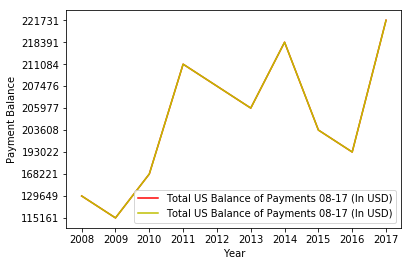

In [243]:
y = plt.plot(xb, yb, label ='Total US Balance of Payments 08-17 (In USD)', color = 'y')
r = plt.plot(xb, yb, label ='Total US Balance of Payments 08-17 (In USD)', color = 'r')

plt.xlabel('Year')
plt.ylabel('Payment Balance')
plt.legend()
#plt.show()
y, r

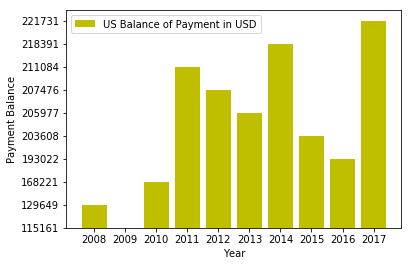

In [233]:
plt.bar(xb, yb, label = 'US Balance of Payment in USD', color = 'y')
plt.xlabel('Year')
plt.ylabel('Payment Balance')
plt.legend()

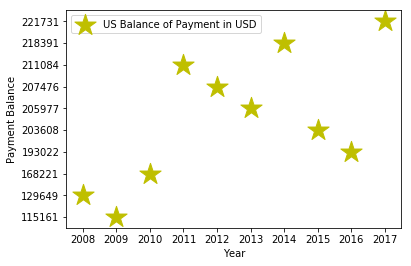

In [234]:
plt.scatter(xb, yb, label = 'US Balance of Payment in USD', color = 'y', s = 500, marker = '*')
plt.xlabel('Year')
plt.ylabel('Payment Balance')
plt.legend()

## US International Trade Exports: Total  Value (goods)in US Dollars, monthly level - Annual - From Period	2009 to 2017

In [49]:
exports_url = 'https://api.db.nomics.world/api/v1/json/series/oecd-mei-usa-xtexva01-cxml-a'
exports_response = requests.get(exports_url)

json_exports = json.loads(exports_response.text)

for z in json_exports.keys():
    print (z + ':', json_exports[z])


data: {'attributes': {'powercode': '9', 'time-format': 'p1y', 'unit': 'usd'}, 'codelists': {}, 'dataset_code': 'MEI', 'dimensions': {'frequency': 'a', 'location': 'usa', 'measure': 'cxml', 'subject': 'xtexva01'}, 'end_date': 47, 'end_ts': '2017-01-01T00:00:00+00:00', 'frequency': 'A', 'key': 'USA.XTEXVA01.CXML.A', 'last_update_ds': '2018-06-09T06:47:44+00:00', 'last_update_widu': '2018-06-09T07:10:06+00:00', 'name': 'United States - International Trade > Exports > Value (goods) > Total - US Dollars, monthly level - Annual', 'provider_name': 'OECD', 'slug': 'oecd-mei-usa-xtexva01-cxml-a', 'start_date': -15, 'start_ts': '1955-01-01T00:00:00+00:00', 'tags': ['annual', 'annually', 'billions', 'co-operation', 'country', 'cxml', 'development', 'dollar', 'dollars', 'economic', 'economics', 'exports', 'format', 'frequency', 'goods', 'indicators', 'international', 'level', 'main', 'measure', 'mei', 'monthly', 'multiplier', 'oecd', 'organisation', 'states', 'subject', 'time', 'total', 'trade', '

In [50]:
json_exports['data']['values']

[{'attributes': {}, 'period': '1955', 'value': '14.2869'},
 {'attributes': {}, 'period': '1956', 'value': '17.333'},
 {'attributes': {}, 'period': '1957', 'value': '20.875'},
 {'attributes': {}, 'period': '1958', 'value': '17.919'},
 {'attributes': {}, 'period': '1959', 'value': '17.642'},
 {'attributes': {}, 'period': '1960', 'value': '20.599'},
 {'attributes': {}, 'period': '1961', 'value': '21.038'},
 {'attributes': {}, 'period': '1962', 'value': '21.717'},
 {'attributes': {}, 'period': '1963', 'value': '23.349'},
 {'attributes': {}, 'period': '1964', 'value': '26.507'},
 {'attributes': {}, 'period': '1965', 'value': '27.479'},
 {'attributes': {}, 'period': '1966', 'value': '30.32'},
 {'attributes': {}, 'period': '1967', 'value': '31.526'},
 {'attributes': {}, 'period': '1968', 'value': '34.228'},
 {'attributes': {}, 'period': '1969', 'value': '38.005'},
 {'attributes': {}, 'period': '1970', 'value': '43.225'},
 {'attributes': {}, 'period': '1971', 'value': '44.129'},
 {'attributes'

In [59]:
exports_df = pd.DataFrame.from_dict(json_exports['data']['values'])
print(len(exports_df)) #Print how many rows
print(exports_df.columns) #Print column names
exports_df = exports_df.drop(columns = ['attributes'])
exports_df.head()

63
Index(['attributes', 'period', 'value'], dtype='object')


,period,value
0,1955,14.2869
1,1956,17.333
2,1957,20.875
3,1958,17.919
4,1959,17.642


In [61]:
e_year = exports_df['period'][54:63]
e_value = exports_df['value'][54:63]
x1 = e_year
y1 = e_value

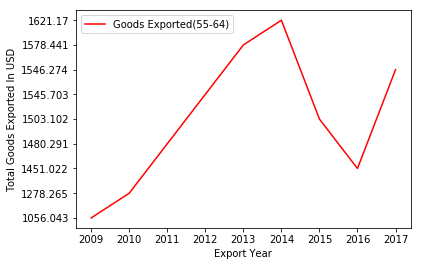

In [62]:
plt.plot(x1, y1, label = 'Goods Exported(55-64)', color = 'r')
plt.xlabel('Export Year')
plt.ylabel('Total Goods Exported In USD')
plt.legend()
plt.show()

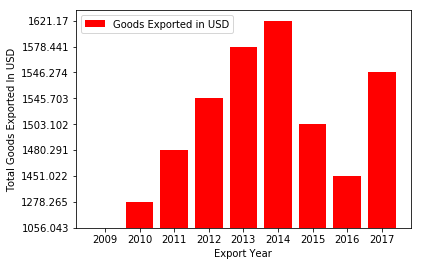

In [63]:
plt.bar(x1, y1, label = 'Goods Exported in USD', color ='r')
plt.xlabel('Export Year')
plt.ylabel('Total Goods Exported In USD')
plt.legend()

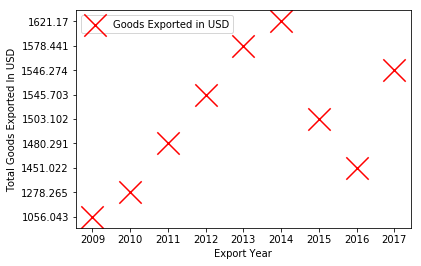

In [64]:
plt.scatter(x1, y1, label = 'Goods Exported in USD', color ='r', s = 500, marker = 'x')
plt.xlabel('Export Year')
plt.ylabel('Total Goods Exported In USD')
plt.legend()

## US International Trade Imports: Total Value (goods) in US Dollars, monthly level - Annual - From  2009 to 2017

In [37]:
imports_url = 'https://api.db.nomics.world/api/v1/json/series/oecd-mei-usa-xtimva01-cxml-a'
imports_response = requests.get(imports_url)

json_imports = json.loads(imports_response.text)

for x in json_imports.keys():
    print (x + ':', json_imports[x])


data: {'attributes': {'powercode': '9', 'time-format': 'p1y', 'unit': 'usd'}, 'codelists': {}, 'dataset_code': 'MEI', 'dimensions': {'frequency': 'a', 'location': 'usa', 'measure': 'cxml', 'subject': 'xtimva01'}, 'end_date': 47, 'end_ts': '2017-01-01T00:00:00+00:00', 'frequency': 'A', 'key': 'USA.XTIMVA01.CXML.A', 'last_update_ds': '2018-06-09T06:47:44+00:00', 'last_update_widu': '2018-06-09T06:50:38+00:00', 'name': 'United States - International Trade > Imports > Value (goods) > Total - US Dollars, monthly level - Annual', 'provider_name': 'OECD', 'slug': 'oecd-mei-usa-xtimva01-cxml-a', 'start_date': -15, 'start_ts': '1955-01-01T00:00:00+00:00', 'tags': ['annual', 'annually', 'billions', 'co-operation', 'country', 'cxml', 'development', 'dollar', 'dollars', 'economic', 'economics', 'format', 'frequency', 'goods', 'imports', 'indicators', 'international', 'level', 'main', 'measure', 'mei', 'monthly', 'multiplier', 'oecd', 'organisation', 'states', 'subject', 'time', 'total', 'trade', '

In [99]:
#json_imports['data']['values']

In [65]:
imports_df = pd.DataFrame.from_dict(json_imports['data']['values'])
print(len(imports_df)) #Print how many rows
print(imports_df.columns) #Print column names
imports_df = imports_df.drop(columns = 'attributes')
imports_df.head()

63
Index(['attributes', 'period', 'value'], dtype='object')


,period,value
0,1955,11.3844
1,1956,12.6149
2,1957,13.413
3,1958,13.387
4,1959,15.69


In [66]:
import matplotlib.pyplot as plt

In [67]:
time = imports_df['period'][54:63]
ivalue = imports_df['value'][54:63]
x = time
y = ivalue

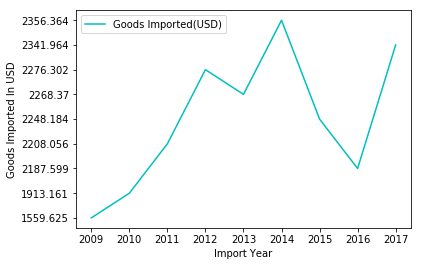

In [68]:
plt.plot(time, ivalue, label = 'Goods Imported(USD)', color = 'c')
plt.xlabel('Import Year')
plt.ylabel('Goods Imported In USD')
plt.legend()
plt.show()

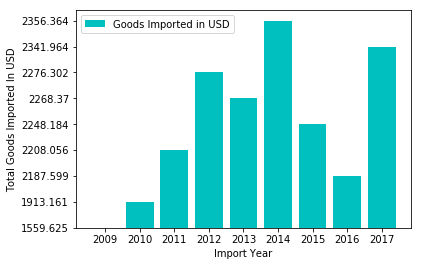

In [69]:
plt.bar(x, y, label = 'Goods Imported in USD', color = 'c')
plt.xlabel('Import Year')
plt.ylabel('Total Goods Imported In USD')
plt.legend()

In [70]:
plt.bar

<function matplotlib.pyplot.bar>

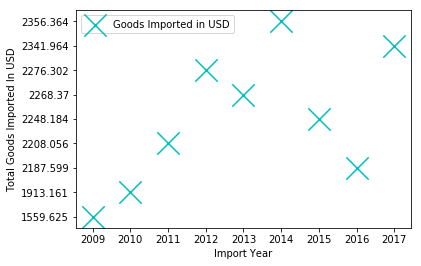

In [71]:
plt.scatter(x, y, label = 'Goods Imported in USD', color = 'c', s = 500, marker = 'x')
plt.xlabel('Import Year')
plt.ylabel('Total Goods Imported In USD')
plt.legend()

### Comparing US Trade Imports and Exports for the Period between 2009-2017

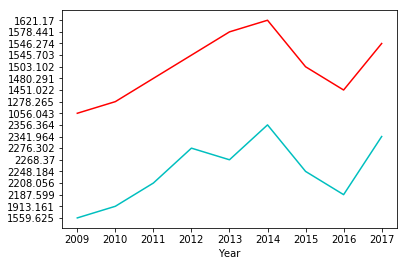

In [72]:
plt.plot(x, y, 'c')
plt.plot(x1, y1, 'r')
plt.xlabel('Year')

plt.show()

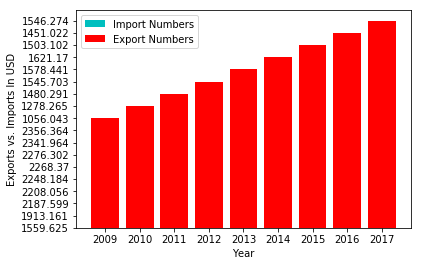

In [73]:
plt.bar(x, y, label = 'Import Numbers', color = 'c')
plt.bar(x1, y1, label = 'Export Numbers', color = 'r')
plt.xlabel('Year')
plt.ylabel('Exports vs. Imports In USD')
plt.legend()
plt.show()

Plotting Import and Export Number 

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



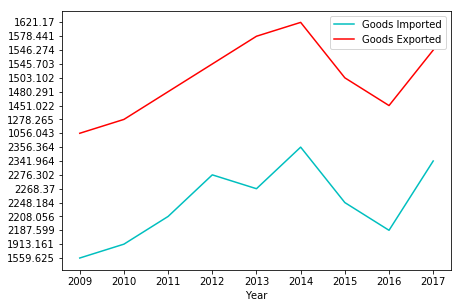

In [85]:
plt.axes([0.5,0.5,0.9,0.9])
plt.plot(x, y, label = 'Goods Imported', color = 'c')
plt.xlabel('Year')
plt.legend()
plt.axes([0.5,0.5,0.9,0.9])
plt.plot(x1, y1, label = 'Goods Exported', color = 'r')
plt.xlabel('Year')
plt.legend()
plt.show()

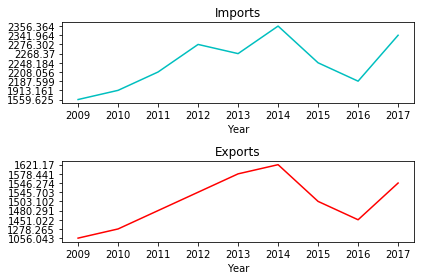

In [78]:
plt.subplot(2, 1, 1)
plt.plot(x, y, color = 'c')
plt.xlabel('Year')
plt.title('Imports')
plt.subplot(2, 1, 2)
plt.plot(x1, y1, color = 'r')
plt.xlabel('Year')
plt.title('Exports')
plt.tight_layout()
plt.show()

In [88]:
from bokeh.charts import Scatter

ModuleNotFoundError: No module named 'bokeh.charts'

In [86]:
p = Scatter(imports_df, x = 'period', y = 'value', title = 'US Trade Imports', xlabel = 'Year', ylabel = 'Value')

NameError: name 'Scatter' is not defined

United States - Balance of payments BPM6 > Current account Balance > Services > Total Balance - US Dollars, sum over component sub-periods - Quarterly

In [24]:
quat_url = 'https://api.db.nomics.world/api/v1/json/series/oecd-mei-usa-b6blse01-cxcu-qhttp'
quat_response = requests.get(quat_url)
quat_response.text


'<h3>404 Error</h3><h4>The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.</h4>'

In [20]:


json_quat = json.loads(quat_response.text)

for z in json_quat.keys():
    print (z + ':', json_quat[z])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
import tradingeconomics as te
te.login()

'You are logged in as a guest:guest'

In [7]:
te.getIndicatorData(country=['united states'], output_type='df')


,Country,Category,LatestValue,LatestValueDate,Source,Unit,CategoryGroup,Frequency,PreviousValue,PreviousValueDate
0,United States,ADP Employment Change,219.00,2018-07-31T00:00:00,"Automatic Data Processing, Inc.",Thousand,Labour,Monthly,181.00,2018-06-30T00:00:00
1,United States,API Crude Oil Stock Change,0.04,2018-08-24T00:00:00,American Petroleum Institute (API),BBL/1Million,Business,Weekly,-5.17,2018-08-17T00:00:00
2,United States,Asylum Applications,6901.00,2018-04-30T00:00:00,United Nations Refugee Agency,Persons,Government,Monthly,10167.00,2017-12-31T00:00:00
3,United States,Average Hourly Earnings,0.30,2018-07-31T00:00:00,U.S. Bureau of Labor Statistics,percent,Labour,Monthly,0.10,2018-06-30T00:00:00
4,United States,Average Weekly Hours,34.50,2018-07-31T00:00:00,U.S. Bureau of Labor Statistics,Hours,Labour,Monthly,34.60,2018-06-30T00:00:00
5,United States,Balance of Trade,-46348.00,2018-06-30T00:00:00,U.S. Census Bureau,USD Million,Trade,Monthly,-43186.00,2018-05-31T00:00:00
6,United States,Bank Lending Rate,5.00,2018-07-31T00:00:00,Federal Reserve,percent,Consumer,Monthly,4.89,2018-06-30T00:00:00
7,United States,Bankruptcies,22245.00,2018-06-30T00:00:00,Administrative Office of the U.S. Courts,Companies,Business,Quarterly,23106.00,2018-03-31T00:00:00
8,United States,Banks Balance Sheet,16773802.00,2018-08-08T00:00:00,Federal Reserve,USD Million,Money,Weekly,16773629.00,2018-08-01T00:00:00
9,United States,Building Permits,1311.00,2018-07-31T00:00:00,U.S. Census Bureau,Thousand,Housing,Monthly,1292.00,2018-06-30T00:00:00


In [8]:
te.getIndicatorData(country='united states', indicators='bot')

{'United States': {'GDP': [{'CategoryGroup': 'GDP',
    'Frequency': 'Yearly',
    'LatestValue': 19390.6,
    'LatestValueDate': '2017-12-31T00:00:00',
    'PreviousValue': 18624.48,
    'PreviousValueDate': '2016-12-31T00:00:00',
    'Source': 'World Bank',
    'Unit': 'USD Billion'}]}}